In [36]:
#Importing the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
df=pd.read_csv('http://bit.ly/w-data')  #Reading the data

In [38]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [40]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


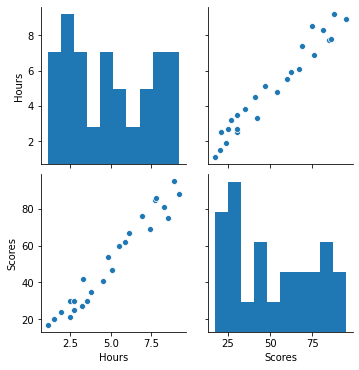

In [41]:
sns.pairplot(df)  #To plot the values of different columns against each other

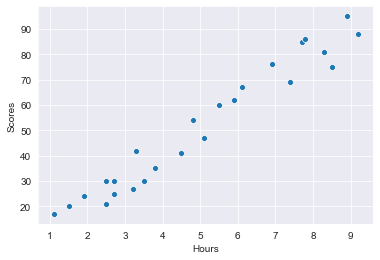

In [42]:
sns.set_style('darkgrid')
sns.scatterplot(x='Hours',y='Scores',data=df)  #for plotting the scores against the hours

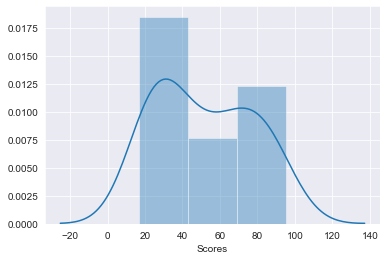

In [43]:
sns.distplot(df['Scores'])         
#y axis represents density of scores
#x axis represents the scores

In [44]:
df.corr()


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


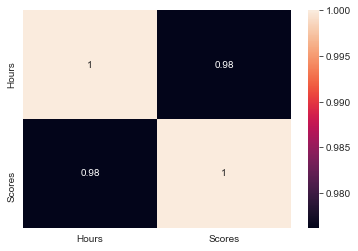

In [45]:
sns.heatmap(df.corr(),annot=True)
#the high correlation values show that the scores that ht estudents obtain are closely related to the hours.

In [46]:
X=df.drop('Scores',axis=1)
y=df['Scores']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
#train_test_split is used to split the data into the train and test data part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lnr=LinearRegression()

In [51]:
lnr.fit(X_train,y_train)

LinearRegression()

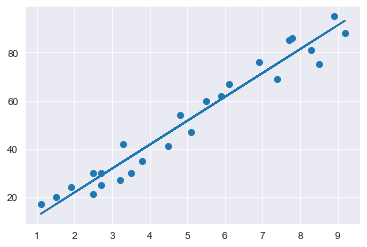

In [52]:
# Plotting the regression line
line = lnr.coef_*X+lnr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [53]:
X_test

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


In [54]:
X_test.shape

(5, 1)

In [55]:
pred=lnr.predict(X_test)

In [56]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
df2 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [62]:
lnr.predict([[9.25]])  #predicting the output of a random value of the hours-9.25

array([93.69173249])

In [58]:
pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

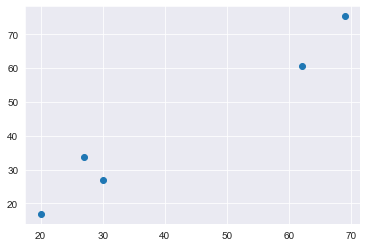

In [59]:
plt.scatter(y_test,pred)
#this plot plots the test values against the predicted values

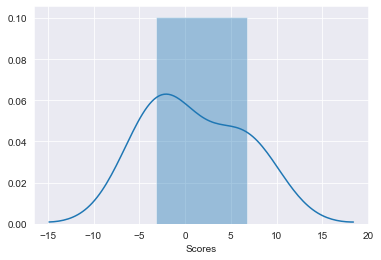

In [60]:
sns.distplot((pred-y_test))
#this plot shows the density of the errors between actual and predicted values

In [61]:
#Model Evaluations
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,pred))
print('Root Mean Square Error: ',np.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean Absolute Error:  4.183859899002975
Mean Squared Error:  21.598769307217406
Root Mean Square Error:  4.647447612100367
